In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Text_Similarity.csv")
df.shape

(3000, 2)

In [4]:
df.head(5)

,text1,text2
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...


In [5]:
df.tail(5)

,text1,text2
2995,uk directors guild nominees named martin scors...,steel firm to cut 45 000 jobs mittal steel ...
2996,u2 to play at grammy awards show irish rock ba...,israel looks to us for bank chief israel has a...
2997,pountney handed ban and fine northampton coach...,india and iran in gas export deal india has si...
2998,belle named best scottish band belle & sebas...,mido makes third apology ahmed mido hossam h...
2999,criminal probe on citigroup deals traders at u...,former ni minister scott dies former northern ...


In [6]:
df.sample(5)

,text1,text2
453,early elvis recordings go on sale some of elvi...,roche turns down federer offer australian te...
451,lewis-francis eyeing world gold mark lewis-fra...,hantuchova in dubai last eight daniela hantuch...
2375,david blunkett in quotes david blunkett - who ...,chancellor rallies labour voters gordon brown ...
2249,housing plans criticised by mps irreversible ...,stallone evicted from big brother jackie stall...
1920,sony psp tipped as a must-have sony s playst...,microsoft debuts security tools microsoft is r...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text1   3000 non-null   object
 1   text2   3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB


In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)
df.shape

(2999, 2)

In [10]:
df.duplicated().sum()

0

In [11]:
df.text1[0]

'broadband challenges tv viewing the number of europeans with broadband has exploded over the past 12 months  with the web eating into tv viewing habits  research suggests.  just over 54 million people are hooked up to the net via broadband  up from 34 million a year ago  according to market analysts nielsen/netratings. the total number of people online in europe has broken the 100 million mark. the popularity of the net has meant that many are turning away from tv  say analysts jupiter research. it found that a quarter of web users said they spent less time watching tv in favour of the net  the report by nielsen/netratings found that the number of people with fast internet access had risen by 60% over the past year.  the biggest jump was in italy  where it rose by 120%. britain was close behind  with broadband users almost doubling in a year. the growth has been fuelled by lower prices and a wider choice of always-on  fast-net subscription plans.  twelve months ago high speed internet

In [12]:
df.text2[0]

'gardener wins double in glasgow britain s jason gardener enjoyed a double 60m success in glasgow in his first competitive outing since he won 100m relay gold at the athens olympics.  gardener cruised home ahead of scot nick smith to win the invitational race at the norwich union international. he then recovered from a poor start in the second race to beat swede daniel persson and italy s luca verdecchia. his times of 6.61 and 6.62 seconds were well short of american maurice greene s 60m world record of 6.39secs from 1998.  it s a very hard record to break  but i believe i ve trained very well   said the world indoor champion  who hopes to get closer to the mark this season.  it was important to come out and make sure i got maximum points. my last race was the olympic final and there was a lot of expectation.  this was just what i needed to sharpen up and get some race fitness. i m very excited about the next couple of months.   double olympic champion  marked her first appearance on h

## **Text Preprocessing**

In [13]:
chat_words = {
    'AFAIK': 'As Far As I Know',
    'AFK': 'Away From Keyboard',
    'ASAP': 'As Soon As Possible',
    'ATK': 'At The Keyboard',
    'ATM': 'At The Moment',
    'A3': 'Anytime, Anywhere, Anyplace',
    'BAK': 'Back At Keyboard',
    'BBL': 'Be Back Later',
    'BBS': 'Be Back Soon',
    'BFN': 'Bye For Now',
    'B4N': 'Bye For Now',
    'BRB': 'Be Right Back',
    'BRT': 'Be Right There',
    'BTW': 'By The Way',
    'B4': 'Before',
    'B4N': 'Bye For Now',
    'CU': 'See You',
    'CUL8R': 'See You Later',
    'CYA': 'See You',
    'FAQ': 'Frequently Asked Questions',
    'FC': 'Fingers Crossed',
    'FWIW': 'For What It\'s Worth',
    'FYI': 'For Your Information',
    'GAL': 'Get A Life',
    'GG': 'Good Game',
    'GN': 'Good Night',
    'GMTA': 'Great Minds Think Alike',
    'GR8': 'Great!',
    'G9': 'Genius',
    'IC': 'I See',
    'ICQ': 'I Seek you (also a chat program)',
    'ILU': 'ILU: I Love You',
    'IMHO': 'In My Honest/Humble Opinion',
    'IMO': 'In My Opinion',
    'IOW': 'In Other Words',
    'IRL': 'In Real Life',
    'KISS': 'Keep It Simple, Stupid',
    'LDR': 'Long Distance Relationship',
    'LMAO': 'Laugh My A.. Off',
    'LOL': 'Laughing Out Loud',
    'LTNS': 'Long Time No See',
    'L8R': 'Later',
    'MTE': 'My Thoughts Exactly',
    'M8': 'Mate',
    'NRN': 'No Reply Necessary',
    'OIC': 'Oh I See',
    'PITA': 'Pain In The A..',
    'PRT': 'Party',
    'PRW': 'Parents Are Watching',
    'QPSA': 'Que Pasa?',
    'ROFL': 'Rolling On The Floor Laughing',
    'ROFLOL': 'Rolling On The Floor Laughing Out Loud',
    'ROTFLMAO': 'Rolling On The Floor Laughing My A.. Off',
    'SK8': 'Skate',
    'STATS': 'Your sex and age',
    'ASL': 'Age, Sex, Location',
    'THX': 'Thank You',
    'TTFN': 'Ta-Ta For Now!',
    'TTYL': 'Talk To You Later',
    'U': 'You',
    'U2': 'You Too',
    'U4E': 'Yours For Ever',
    'WB': 'Welcome Back',
    'WTF': 'What The F...',
    'WTG': 'Way To Go!',
    'WUF': 'Where Are You From?',
    'W8': 'Wait...',
    '7K': 'Sick:-D Laughter',
    'TFW': 'That feeling when. TFW internet slang often goes in a caption to an image.',
    'MFW': 'My face when',
    'MRW': 'My reaction when',
    'IFYP': 'I feel your pain',
    'LOL': 'Laughing out loud',
    'TNTL': 'Trying not to laugh',
    'JK': 'Just kidding',
    'IDC': 'I don’t care',
    'ILY': 'I love you',
    'IMU': 'I miss you',
    'ADIH': 'Another day in hell',
    'IDC': 'I don’t care',
    'ZZZ': 'Sleeping, bored, tired',
    'WYWH': 'Wish you were here',
    'TIME': 'Tears in my eyes',
    'BAE': 'Before anyone else',
    'FIMH': 'Forever in my heart',
    'BSAAW': 'Big smile and a wink',
    'BWL': 'Bursting with laughter',
    'LMAO': 'Laughing my a** off',
    'BFF': 'Best friends forever',
    'CSL': 'Can’t stop laughing'
}

In [14]:
def chat_word_treat(text):
    l=[]
    for w in text.split():
        if w.upper() in chat_words:
            l.append(chat_words[w.upper()])
        else:
            l.append(w)
    return ''.join(text)

In [15]:
df['text1']=df['text1'].apply(chat_word_treat)
df.sample(5)

,text1,text2
1726,gadget market to grow in 2005 the explosion ...,blair backs pre-election budget tony blair h...
2798,no re-draft for eu patent law a proposed euro...,stock market eyes japan recovery japanese shar...
384,franz man seeks government help franz ferdinan...,cable offers video-on-demand cable firms ntl a...
1357,thomas out of six nations wales captain gareth...,poll explains free-kick decision referee graha...
1979,ferguson fears milan cutting edge manchester u...,johnson edges out rival sotherton jade johnson...


In [16]:
df['text2']=df['text2'].apply(chat_word_treat)
df.sample(5)

,text1,text2
1738,civil servants in strike ballot the uk s bigge...,henson stakes early lions claim the six nation...
1987,mobile multimedia slow to catch on there is no...,smart search lets art fans browse if you don t...
2148,us ahold suppliers face charges us prosecutors...,eminem beats elvis to number one rapper eminem...
2639,hotspot users gain free net calls people using...,venezuela identifies idle farms venezuelan a...
778,brown outlines third term vision gordon brown ...,baa support ahead of court battle uk airport o...


In [17]:
df['text1']=df['text1'].str.lower()
df.sample(5)

,text1,text2
2990,millions to miss out on the net by 2025 40% o...,rocker doherty in on-stage fight rock singer p...
836,bond game fails to shake or stir for gaming fa...,amnesty chief laments war failure the lack of ...
1341,microsoft takes on desktop search microsoft ha...,wales must learn health lessons the new heal...
767,parties build up poll war chests the labour pa...,us ahold suppliers face charges us prosecutors...
602,saudi ncci s shares soar shares in saudi arabi...,scots smoking ban details set out smoke-free a...


In [18]:
df['text2']=df['text2'].str.lower()
df.sample(5)

,text1,text2
243,blind student hears in colour a blind studen...,itunes now selling band aid song ipod owners c...
2488,baby becomes new oscar favourite clint eastwoo...,chancellor rallies labour voters gordon brown ...
2212,bush website blocked outside us surfers outsid...,ocean s twelve raids box office ocean s twelve...
1860,football manager scores big time for the past ...,kenyan school turns to handhelds at the mbita ...
1964,ebbers denies worldcom fraud former worldcom c...,at a glance: tory health checks the uk opposi...


In [19]:
from bs4 import BeautifulSoup

In [20]:
def remove_htmlTags(text):
    s=BeautifulSoup(text,'html.parser')
    return s.get_text()

In [21]:
df['text1']=df['text1'].apply(remove_htmlTags)
df['text1'].iloc[1]

'rap boss arrested over drug find rap mogul marion  suge  knight has been arrested for violating his parole after he was allegedly found with marijuana.  he was arrested in barstow  california  on saturday following an alleged traffic offence. he is expected to be transferred to a state prison while a decision is made on whether he should be released. mr knight  founder of death row records  served a 10-month jail term in 2004 for punching a man while on parole for an assault conviction. police said mr knight was stopped on saturday after performing an illegal u-turn and a search of his car allegedly found marijuana.  he is also accused of not having insurance. a 18-year-old woman in the car was arrested for providing false information and having a fake id card. she was later released. it was his second alleged violation  having previously served half of a nine-year sentence for breaking the terms of his parole. mr knight  39  was jailed in october 1996 following his involvement in a f

In [22]:
df['text2']=df['text2'].apply(remove_htmlTags)
df['text2'].iloc[1]

'amnesty chief laments war failure the lack of public outrage about the war on terror is a powerful indictment of the failure of human rights groups  amnesty international s chief has said.  in a lecture at the london school of economics  irene khan said human rights had been flouted in the name of security since 11 september  2001. she said the human rights movement had to use simpler language both to prevent scepticism and spread a moral message. and it had to fight poverty  not just focus on political rights for elites.  ms khan highlighted detentions without trial  including those at the us camp at guantanamo bay in cuba  and the abuse of prisoners as evidence of increasing human rights problems.  what s a new challenge is the way in which this age-old debate on security and human rights has been translated into the language of war   she said.  by using the language of war  human rights are being sidelined because we know human rights do not apply in times of war.  ms khan said suc

In [23]:
import string

In [24]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text=text.replace(punctuation,"")
    return text

In [25]:
df['text1']=df['text1'].apply(remove_punctuation)
df.sample(5)

,text1,text2
526,row threatens hendrix museum plan proposals to...,fbi agent colludes with analyst a former fbi a...
2841,broadband steams ahead in the us more and more...,jp morgan admits us slavery links thousands of...
1493,newcastle to join morientes race newcastle hav...,band aid retains number one spot the charity s...
1486,downloads enter us singles chart digital music...,japan bank shares up on link talk shares of su...
2981,india and russia in energy talks india and rus...,emi shares hit by profit warning shares in mus...


In [26]:
df['text2']=df['text2'].apply(remove_punctuation)
df.sample(5)

,text1,text2
1709,kinnock to urge reform in lords neil kinnock h...,celebrities get their skates on former england...
247,arsenal may seek full share listing arsenal ...,retail sales show festive fervour uk retail sa...
1877,eu china arms ban to be lifted the eu embarg...,blair said he would stand down tony blair pr...
568,muslims discuss election concerns issues that ...,nadal marches on in mexico rafael nadal contin...
1868,nasdaq planning 100m share sale the owner of t...,minister digs in over doping row the belgian s...


In [27]:
df['text1'].describe()

count                                                  2999
unique                                                 1277
top       moody joins up with england lewis moody has fl...
freq                                                      9
Name: text1, dtype: object

In [28]:
df['text2'].describe()

count                                                  2999
unique                                                 1256
top       edwards tips idowu for euro gold world outdoor...
freq                                                     12
Name: text2, dtype: object

# **Using TF-IDF for Text Representation**

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
tfidf=TfidfVectorizer(stop_words='english')

In [31]:
text_data=df.text1.astype(str)+" "+df.text2.astype(str) # Combine text1 and text2 into a single column

In [32]:
tfidf_matrix=tfidf.fit_transform(text_data)

# Extract vectors for each text from the tfidf_matrix
vect_text1=tfidf.transform(df.text1).toarray()
vect_text2=tfidf.transform(df.text2).toarray()

In [33]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarities=[]
vect1=[]
vect2=[]
for i in range(len(df)):
    vector1=vect_text1[i].reshape(1, -1)
    vector2=vect_text2[i].reshape(1, -1)
    similarity=cosine_similarity(vector1, vector2)[0][0]
    vect1.append(vector1)
    vect2.append(vector2)
    cosine_similarities.append(similarity)

# Add the cosine similarity column to the DataFrame
df['text1_vect']=vect1
df['text2_vect']=vect2
df['similarity']=cosine_similarities
df

,text1,text2,text1_vect,text2_vect,similarity
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.050569
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.003627
2,player burnout worries robinson england coach ...,hanks greeted at wintry premiere hollywood sta...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.005480
3,hearts of oak 32 cotonsport hearts of oak set ...,redford s vision of sundance despite sporting ...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.019261698099293255, 0.0, 0.0, 0.0, 0....",0.010675
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...,"[[0.0, 0.04063327989651423, 0.0, 0.0, 0.0, 0.0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.012677
...,...,...,...,...,...
2995,uk directors guild nominees named martin scors...,steel firm to cut 45 000 jobs mittal steel ...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.1511419087602039, 0.0, 0.0, 0.0, 0.0,...",0.001837
2996,u2 to play at grammy awards show irish rock ba...,israel looks to us for bank chief israel has a...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.015687
2997,pountney handed ban and fine northampton coach...,india and iran in gas export deal india has si...,"[[0.0, 0.03491958151862175, 0.0, 0.0, 0.0, 0.0...","[[0.0, 0.02570997059236551, 0.0, 0.0, 0.0, 0.0...",0.002321
2998,belle named best scottish band belle sebast...,mido makes third apology ahmed mido hossam h...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.009517


In [34]:
df.sample(5)

,text1,text2,text1_vect,text2_vect,similarity
975,teenagers to be allowed to be mps teenagers wi...,umaga ready for fearsome lions all blacks ca...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.013742
2191,uk helps raped rwandan women britain is to giv...,venezuela identifies idle farms venezuelan a...,"[[0.0, 0.054561479226786946, 0.0, 0.0, 0.0, 0....","[[0.0, 0.024220153438849493, 0.0, 0.0, 0.0, 0....",0.005482
670,chelsea hold arsenal a gripping game between a...,ferguson rues failure to cut gap boss sir alex...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.143901
610,fockers retain film chart crown comedy meet th...,air passengers win new eu rights air passenger...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.013178
2921,parmar ruled out of davis cup tie a knee injur...,share boost for feudhit reliance the board of ...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.005086


### **Use below code for testing sample sentences**

In [35]:
# Sample data
data={'text1': ["I love natural language processing.", "Machine learning is so easy.","The sun is shining brightly in the clear blue sky."],
        'text2': ["I live in Manhattan to study natural language processing.", "Machine learning is difficult","Blue skies and sunshine create a beautiful day."]}

# Create a DataFrame
df_sample=pd.DataFrame(data)

texts_sample=df_sample['text1'].astype(str) + ' ' + df_sample['text2'].astype(str)
tfidf_sample=TfidfVectorizer(stop_words='english')
tfidf_matrix_sample=tfidf_sample.fit_transform(texts_sample)

vectors_text1_sample=tfidf_sample.transform(df_sample['text1']).toarray()
vectors_text2_sample=tfidf_sample.transform(df_sample['text2']).toarray()

# Calculate cosine similarity for each pair of sentences
similarities_sample=[]
vect1=[]
vect2=[]
for i in range(len(df_sample)):
    vector1=vectors_text1_sample[i].reshape(1, -1)
    vector2=vectors_text2_sample[i].reshape(1, -1)
    similarity=cosine_similarity(vector1, vector2)
    similarities_sample.append(similarity[0][0])

df_sample['cosine_similarity']=similarities_sample

df_sample


,text1,text2,cosine_similarity
0,I love natural language processing.,I live in Manhattan to study natural language ...,0.612372
1,Machine learning is so easy.,Machine learning is difficult,0.666667
2,The sun is shining brightly in the clear blue ...,Blue skies and sunshine create a beautiful day.,0.166667


## FOR TESTING WITH BENCHMARK DATASET

In [36]:
new_df=pd.read_excel('Benchmark_SemanticTextSimilarity_scores.xlsx')
new_df.head(5)

,Text1,Text2,benchmark_similarity_score
0,A plane is taking off.,An air plane is taking off.,1.00
1,A man is playing a large flute.,A man is playing a flute.,0.76
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,0.76
3,Three men are playing chess.,Two men are playing chess.,0.52
4,A man is playing the cello.,A man seated is playing the cello.,0.85


In [37]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6952 entries, 0 to 6951
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Text1                       6952 non-null   object 
 1   Text2                       6947 non-null   object 
 2   benchmark_similarity_score  6952 non-null   float64
dtypes: float64(1), object(2)
memory usage: 163.1+ KB


In [38]:
new_df.isnull().sum()

Text1                         0
Text2                         5
benchmark_similarity_score    0
dtype: int64

In [39]:
new_df.dropna(inplace=True)

In [40]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6947 entries, 0 to 6951
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Text1                       6947 non-null   object 
 1   Text2                       6947 non-null   object 
 2   benchmark_similarity_score  6947 non-null   float64
dtypes: float64(1), object(2)
memory usage: 217.1+ KB


In [41]:
def chat_word_treat(text):
    if isinstance(text, str):
        l=[]
        for w in text.split():
            if w.upper() in chat_words:
                l.append(chat_words[w.upper()])
            else:
                l.append(w)
        return ' '.join(l)
    else:
        return ""

In [42]:
new_df['text1']=new_df['Text1'].apply(chat_word_treat)
new_df.head(5)

,Text1,Text2,benchmark_similarity_score,text1
0,A plane is taking off.,An air plane is taking off.,1.00,A plane is taking off.
1,A man is playing a large flute.,A man is playing a flute.,0.76,A man is playing a large flute.
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,0.76,A man is spreading shreded cheese on a pizza.
3,Three men are playing chess.,Two men are playing chess.,0.52,Three men are playing chess.
4,A man is playing the cello.,A man seated is playing the cello.,0.85,A man is playing the cello.


In [43]:
new_df['text2']=new_df['Text2'].apply(chat_word_treat)
new_df.head(5)

,Text1,Text2,benchmark_similarity_score,text1,text2
0,A plane is taking off.,An air plane is taking off.,1.00,A plane is taking off.,An air plane is taking off.
1,A man is playing a large flute.,A man is playing a flute.,0.76,A man is playing a large flute.,A man is playing a flute.
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,0.76,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...
3,Three men are playing chess.,Two men are playing chess.,0.52,Three men are playing chess.,Two men are playing chess.
4,A man is playing the cello.,A man seated is playing the cello.,0.85,A man is playing the cello.,A man seated is playing the cello.


In [44]:
new_df['text1']=new_df['text1'].str.lower()
new_df.head(5)

,Text1,Text2,benchmark_similarity_score,text1,text2
0,A plane is taking off.,An air plane is taking off.,1.00,a plane is taking off.,An air plane is taking off.
1,A man is playing a large flute.,A man is playing a flute.,0.76,a man is playing a large flute.,A man is playing a flute.
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,0.76,a man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...
3,Three men are playing chess.,Two men are playing chess.,0.52,three men are playing chess.,Two men are playing chess.
4,A man is playing the cello.,A man seated is playing the cello.,0.85,a man is playing the cello.,A man seated is playing the cello.


In [45]:
new_df['text2']=new_df['text2'].str.lower()
new_df.head(5)

,Text1,Text2,benchmark_similarity_score,text1,text2
0,A plane is taking off.,An air plane is taking off.,1.00,a plane is taking off.,an air plane is taking off.
1,A man is playing a large flute.,A man is playing a flute.,0.76,a man is playing a large flute.,a man is playing a flute.
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,0.76,a man is spreading shreded cheese on a pizza.,a man is spreading shredded cheese on an uncoo...
3,Three men are playing chess.,Two men are playing chess.,0.52,three men are playing chess.,two men are playing chess.
4,A man is playing the cello.,A man seated is playing the cello.,0.85,a man is playing the cello.,a man seated is playing the cello.


In [46]:
new_df['text1']=new_df['text1'].apply(remove_htmlTags)
new_df['text1'].iloc[1]

C:\Users\aksha\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


'a man is playing a large flute.'

In [47]:
new_df['text2']=new_df['text2'].apply(remove_htmlTags)
new_df['text2'].iloc[1]

'a man is playing a flute.'

In [48]:
new_df['text1']=new_df['text1'].apply(remove_punctuation)
new_df.head(5)

,Text1,Text2,benchmark_similarity_score,text1,text2
0,A plane is taking off.,An air plane is taking off.,1.00,a plane is taking off,an air plane is taking off.
1,A man is playing a large flute.,A man is playing a flute.,0.76,a man is playing a large flute,a man is playing a flute.
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,0.76,a man is spreading shreded cheese on a pizza,a man is spreading shredded cheese on an uncoo...
3,Three men are playing chess.,Two men are playing chess.,0.52,three men are playing chess,two men are playing chess.
4,A man is playing the cello.,A man seated is playing the cello.,0.85,a man is playing the cello,a man seated is playing the cello.


In [49]:
new_df['text2']=new_df['text2'].apply(remove_punctuation)
new_df.head(5)

,Text1,Text2,benchmark_similarity_score,text1,text2
0,A plane is taking off.,An air plane is taking off.,1.00,a plane is taking off,an air plane is taking off
1,A man is playing a large flute.,A man is playing a flute.,0.76,a man is playing a large flute,a man is playing a flute
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,0.76,a man is spreading shreded cheese on a pizza,a man is spreading shredded cheese on an uncoo...
3,Three men are playing chess.,Two men are playing chess.,0.52,three men are playing chess,two men are playing chess
4,A man is playing the cello.,A man seated is playing the cello.,0.85,a man is playing the cello,a man seated is playing the cello


In [50]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6947 entries, 0 to 6951
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Text1                       6947 non-null   object 
 1   Text2                       6947 non-null   object 
 2   benchmark_similarity_score  6947 non-null   float64
 3   text1                       6947 non-null   object 
 4   text2                       6947 non-null   object 
dtypes: float64(1), object(4)
memory usage: 325.6+ KB


In [51]:
text_data=new_df.text1.astype(str)+" "+new_df.text2.astype(str) # Combine text1 and text2 into a single column

In [52]:
tfidf_matrix=tfidf.fit_transform(text_data)

# Extract vectors for each text from the tfidf_matrix
vect_text1=tfidf.transform(new_df.text1).toarray()
vect_text2=tfidf.transform(new_df.text2).toarray()

In [53]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarities=[]
vect1=[]
vect2=[]
for i in range(len(new_df)):
    vector1=vect_text1[i].reshape(1, -1)
    vector2=vect_text2[i].reshape(1, -1)
    similarity=cosine_similarity(vector1, vector2)[0][0]
    vect1.append(vector1)
    vect2.append(vector2)
    cosine_similarities.append(similarity)

print(len(cosine_similarities))
# Add the cosine similarity column to the DataFrame
# new_df['text1_vect']=vect1
# new_df['text2_vect']=vect2
new_df['similarity']=cosine_similarities
new_df

6947


,Text1,Text2,benchmark_similarity_score,text1,text2,similarity
0,A plane is taking off.,An air plane is taking off.,1.00,a plane is taking off,an air plane is taking off,0.836012
1,A man is playing a large flute.,A man is playing a flute.,0.76,a man is playing a large flute,a man is playing a flute,0.824444
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,0.76,a man is spreading shreded cheese on a pizza,a man is spreading shredded cheese on an uncoo...,0.619338
3,Three men are playing chess.,Two men are playing chess.,0.52,three men are playing chess,two men are playing chess,1.000000
4,A man is playing the cello.,A man seated is playing the cello.,0.85,a man is playing the cello,a man seated is playing the cello,0.805998
...,...,...,...,...,...,...
6947,World's oldest man dies at 116,Japan: World's Oldest Man Ever Dies Aged 116,0.92,worlds oldest man dies at 116,japan worlds oldest man ever dies aged 116,0.828510
6948,Pakistanis vote in landmark election,Pakistan holds landmark election as 29 killed ...,0.68,pakistanis vote in landmark election,pakistan holds landmark election as 29 killed ...,0.397485
6949,Algeria president gets therapy after stroke: s...,Bulgarian president tries to break election st...,0.08,algeria president gets therapy after stroke st...,bulgarian president tries to break election st...,0.072435
6950,Yemen: Fighting in north kills over 120,Janet Yellen: Five things you might not know,0.00,yemen fighting in north kills over 120,janet yellen five things you might not know,0.000000


In [63]:
new_df.sample(10)

,Text1,Text2,benchmark_similarity_score,text1,text2,similarity,similarity_difference
2306,Use of force in defense of person.-A,Use of force by aggressor.,0.24,use of force in defense of persona,use of force by aggressor,0.427836,0.188
3754,Gunman kills 6 in shooting at Wisconsin Sikh t...,Gunman kills six in shooting at Sikh temple in...,1.00,gunman kills 6 in shooting at wisconsin sikh t...,gunman kills six in shooting at sikh temple in...,1.000000,0.000
1335,A person in a red cap standing next to a brick...,A brown horse is standing on grass and scrub.,0.00,a person in a red cap standing next to a brick...,a brown horse is standing on grass and scrub,0.098443,0.098
3763,Navy Jet Crashes Into Apartment Building,US Navy Jet Crashes into Apartment Block,0.84,navy jet crashes into apartment building,us navy jet crashes into apartment block,0.827667,0.012
2330,in Foxe basin was frozen.,Foxe was mostly frozen.,0.84,in foxe basin was frozen,foxe was mostly frozen,0.802561,0.037
5620,A woman is dancing.,A man breaks a stick.,0.00,a woman is dancing,a man breaks a stick,0.000000,0.000
5037,Iran dissidents 'killed in Iraq',France loses influence in Europe,0.00,iran dissidents killed in iraq,france loses influence in europe,0.000000,0.000
3812,Nigeria plane crash: No survivors,4 Chinese among Nigeria plane crash victims,0.52,nigeria plane crash no survivors,4 chinese among nigeria plane crash victims,0.623132,0.103
5383,UN inspectors hail progress over Syria chemica...,U.S. has not concluded Syria used chemical wea...,0.44,un inspectors hail progress over syria chemica...,us has not concluded syria used chemical weapo...,0.353447,0.087
4580,Moderate tremor in the Central Mediterranean,Iran: Moderate candidate wins presidential vote,0.00,moderate tremor in the central mediterranean,iran moderate candidate wins presidential vote,0.249941,0.250


In [64]:
new_df['similarity_difference']=round(abs(new_df['benchmark_similarity_score']-new_df['similarity']),3)
new_df.sample(10)

,Text1,Text2,benchmark_similarity_score,text1,text2,similarity,similarity_difference
4889,Glasgow Helicopter Crash Search Ends,Glasgow Helicopter Crash: At Least Six Dead,0.56,glasgow helicopter crash search ends,glasgow helicopter crash at least six dead,0.713086,0.153
3694,the resolution requires all 192 united nations...,resolution 1540 requires all countries to adop...,0.72,the resolution requires all 192 united nations...,resolution 1540 requires all countries to adop...,0.729845,0.010
1431,A small bird on a tiny branch.,A small bird perched on an icy branch.,0.60,a small bird on a tiny branch,a small bird perched on an icy branch,0.556041,0.044
1754,A small boy in a bathrobe is sitting in a meta...,A boy in a robe sits in a chair.,0.84,a small boy in a bathrobe is sitting in a meta...,a boy in a robe sits in a chair,0.292799,0.547
4738,"12 killed, 25 injured in bomb blast in NW Paki...","6 killed, 12 injured in blast in NW Pakista",0.52,12 killed 25 injured in bomb blast in nw pakistan,6 killed 12 injured in blast in nw pakista,0.672665,0.153
5452,"Philippines typhoon death toll at 4,460: UN","Philippines typhoon death toll rises above 5,000",0.68,philippines typhoon death toll at 4460 un,philippines typhoon death toll rises above 5000,0.630340,0.050
92,The man talked on the telephone.,The man is talking on the phone.,0.72,the man talked on the telephone,the man is talking on the phone,0.084495,0.636
5981,a young girl smiling with her head upside down,A girl poses with her head upside down.,0.92,a young girl smiling with her head upside down,a girl poses with her head upside down,0.682433,0.238
1110,A motorcycle parked next to a car.,A BMW motorcycle parked between two cars.,0.60,a motorcycle parked next to a car,a bmw motorcycle parked between two cars,0.526654,0.073
631,A man is running.,A man is mooing.,0.20,a man is running,a man is mooing,0.170546,0.029


In [56]:
round(new_df['similarity_difference'].describe(),2)

count    6947.00
mean        0.17
std         0.15
min         0.00
25%         0.05
50%         0.13
75%         0.25
max         0.94
Name: similarity_difference, dtype: float64

In [57]:
new_df['similarity_difference'].quantile(0.10)

0.012

In [58]:
new_df['similarity_difference'].quantile(0.30)

0.068

In [59]:
new_df['similarity_difference'].quantile(0.40)

0.096

In [60]:
new_df['similarity_difference'].quantile(0.60)

0.171

In [61]:
new_df['similarity_difference'].quantile(0.80)

0.282

In [62]:
new_df['similarity_difference'].quantile(0.90)

0.388

Correlation Coefficient between benchmark and model similarity scores: 0.7220066204071192


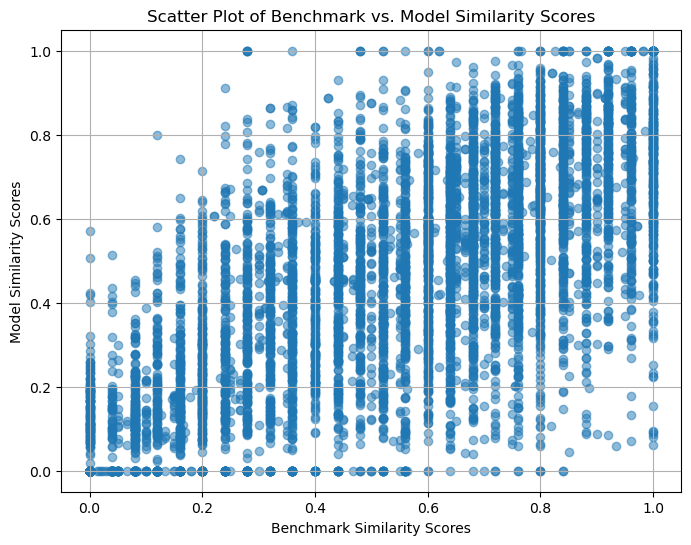

In [65]:
correlation_coefficient = np.corrcoef(new_df['benchmark_similarity_score'], new_df['similarity'])[0, 1]
print("Correlation Coefficient between benchmark and model similarity scores:", correlation_coefficient)

plt.figure(figsize=(8, 6))
plt.scatter(new_df['benchmark_similarity_score'], new_df['similarity'], alpha=0.5)
plt.title('Scatter Plot of Benchmark vs. Model Similarity Scores')
plt.xlabel('Benchmark Similarity Scores')
plt.ylabel('Model Similarity Scores')
plt.grid(True)
plt.show()

## A correlation coefficient closer to 1 indicates a strong positive linear relationship between the two sets of scores.

## Though correlation coefficient of 0.722 is not perfect, it suggests a substantial degree of agreement between your model's predictions and the benchmark similarity scores.

## Therefore, based on this correlation coefficient, my model appears to be quite good at capturing text similarity when compared to the benchmark.